# Detecção dos vertices na bouding box
## Bibliotecas usadas


In [39]:
import os
import cv2
import numpy as np
from PIL import Image
from matplotlib import pyplot

## Métodos para Carregamento das Imagens

<p> Esses dois métodos usam bibliotecas diferentes para realizar o carregamento das imagens, a diferença é que no OpenCV ele não carrega o alfa do png, ficando assim apenas as 3 dimensões padrões de uma imagem. </p>
<p>Os métodos recebem como parâmetro o diretório onde está o conjunto de arquivos e o arquivo que se deseja carregar</p>

In [62]:
def getImgCV(direc, i):
    image_name = os.listdir(direc)
    print(image_name[i])
    img_file = cv2.imread(direc + '/' + image_name[i], 3)
    print("ola", img_file.shape)
    b,g,r = cv2.split(img_file)
    img_file = cv2.merge([r,g,b])
    return img_file

def getImgPil(direc, i):
    image_name = os.listdir(direc)
    print(image_name[i])
    im = Image.open(direc + '/' + image_name[i])
    img_file = np.asarray(im)
    print(img_file.shape)
    return img_file

## BoudingBox File
<p> O método abaixo pega apenas os valores com Red máximos e os guarda em um arquivo txt chamado bouding Box e pinta de azul aqulo que ele reconhelho para termos a noção visual do que está sendo pego </p>

In [63]:
def getBoudingBox(img):
    vertex = {}
    vertexString = ''
    aux = 0
    #Vamos procurando em y o Red no máximo
    for i in range(img.shape[0] - 1):
        #Vamos procurar em x o Red no máximo
        for j in range(img.shape[1] - 1):
            #Vamos pintando de verde e escrevendo os vertices do bouding box em um arquivo
            if img[i][j][0] == 255:
                vertexString += str(i) + ' ' + str(j) + ';'
                vertex["Vertice" + str(aux)] = [i ,j]
                img[i][j][0] = 0
                img[i][j][1] = 255
                aux += 1
    #Abrindo o arquivo e escrevendo de uma só vez
    arq = open('BoudingBox.txt', 'w')
    arq.write(vertexString)
    arq.close()
    pyplot.imshow(img)
    pyplot.show()
    return vertex

## Codigo Teste de criação do txt

LIQUIDO ESPESSADO H1 01 Image09 045.png
ola (480, 640, 3)


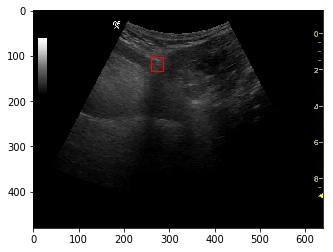

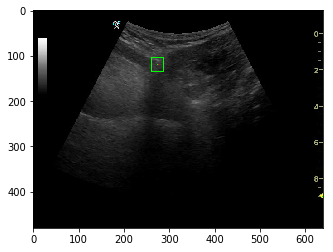

In [64]:
img = getImgCV("FotosMarcadas/", 0)
pyplot.imshow(img)
pyplot.show()
vertex = getBoudingBox(img)
#print(vertex)

## BoudingBox Creation

<p> Baseado no Bouding Box criado no arquivo passado, vamos rotular qualquer outra imagem e pinta-la na imagem </p>

In [65]:
def setBoudingBox(img):
    arq = open('BoudingBox.txt', 'r')
    texto = arq.read()
    arq.close()
    vertices = texto.split(';')
    for i in vertices:
        #Vamos pegar todos os vertices e splitar as partes brancas
        ponto = i.split(' ')
        if ponto[0] == '': #Fim do arquivo
            break
        x = int(ponto[0])
        y = int(ponto[1])
        #print('x:', x,'y:', y)
        img[x][y][0] = 255
    return img

LIQUIDO H4 02 Image16 106.png
ola (480, 640, 3)


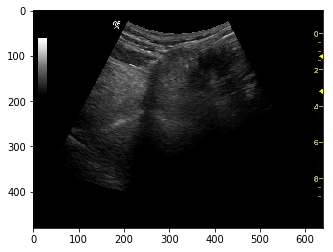

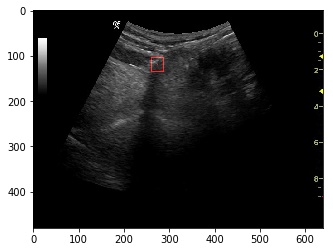

In [69]:
img = getImgCV("FotosMarcadas/", 4)
pyplot.imshow(img)
pyplot.show()
new_img = setBoudingBox(img)
pyplot.imshow(img)
pyplot.show()